In [1]:
from src.data.datasets import *
from glob import glob
import datamol as dm

In [2]:
class BindingMOADTestSet(BasePosesDataset):
    def __init__(
        self, data_dir="/Users/charlie/projects/poses_benchmark/data/bindingmoad_test/"
    ):
        super(BindingMOADTestSet, self).__init__()
        self.data_dir = data_dir

        tmp_files = glob(self.data_dir + "*tmp*")

        print("Removing tmp files...")
        for tmp_file in tmp_files:
            os.remove(tmp_file)

        sdf_files = glob(self.data_dir + "*.sdf")

        # remove broken files
        self.sdf_files = []
        for sdf_file in sdf_files:
            try:
                Chem.SDMolSupplier(sdf_file)
                self.sdf_files.append(sdf_file)
            except:
                print(f"Failed to read sdf file: {sdf_file}")

        self.pdb_files = [
            data_dir + path.split("/")[-1][:9] + ".pdb" for path in self.sdf_files
        ]

    def __len__(self):
        return len(self.sdf_files)

    def prepare_sdf(self, name: str, idx: int = 0):
        return load_mols_from_sdf(self.sdf_files[idx])

    def load_mols(self, idx: int = 0):
        return dm.read_sdf(self.sdf_files[idx])

    def prepare_pdb(self, name: str, idx: int = 0):
        return load_protein_from_pdb(self.pdb_files[idx])


dataset = BindingMOADTestSet()

Removing tmp files...


In [3]:
len(dataset)

130

In [4]:
for data in tqdm(dataset):
    data

  0%|          | 0/130 [00:00<?, ?it/s]ERROR CTab(/usr/local/reduce_wwPDB_het_dict.txt): could not open
*WARNING*: Residues LYS 86  and LYS 92  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues LYS 86  and LYS 92  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues THR 124  and THR 127  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues THR 124  and THR 127  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Res " CA" not in HETATM Connection Database. Hydrogens not added.
*WARNING*: Res " CA" not in HETATM Connection Database. Hydrogens not added.
*WARNING*: Res " CA" not in HETATM Connection Database. Hydrogens not added.
/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/site-packages/MDAnalysis/converters/RDKit.py:451: UserWarning: No `bonds` attribute in this AtomGroup. Guessing bonds based on atoms c

In [5]:
Chem.SDMolSupplier(
    "/Users/charlie/projects/poses_benchmark/data/bindingmoad_test/3K3B-bio2_L31:B:372.sdf"
)

In [6]:
dm.read_sdf(
    "/Users/charlie/projects/poses_benchmark/data/bindingmoad_test/3K3B-bio2_L31:B:372.sdf"
)

[12:42:11] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:42:11] ERROR: Could not sanitize molecule ending on line 56
[12:42:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9


[]

In [12]:
# read sdf with rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromMolFile(
    "/Users/charlie/projects/poses_benchmark/data/bindingmoad_test/3K3B-bio2_L31:B:372.sdf"
)
m

[12:33:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9


In [11]:
dataset[0]

(<prolif.molecule.Molecule with 269 residues and 2418 atoms at 0x1795cb740>,
 <prolif.molecule.sdf_supplier at 0x17928b110>)

In [ ]:
interactions = dataset.all_interactions

Calculating interactions...


BindingMOADTestSet:   1%|          | 1/130 [00:04<08:46,  4.08s/it]

Error with 0


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: pickle data was truncated


  0%|          | 0/1 [00:00<?, ?it/s]

/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/site-packages/prolif/utils.py:284: UserWarning: No interaction detected
  warnings.warn("No interaction detected")
BindingMOADTestSet:   2%|▏         | 2/130 [00:14<16:25,  7.70s/it]

In [16]:
dataset.all_interactions

Calculating interactions...


BindingMOADTestSet:   1%|          | 1/130 [00:08<18:19,  8.53s/it]

Error with 0


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/charlie/opt/anaconda3/envs/poses/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: pickle data was truncated


In [7]:
clashes = dataset.all_clashes

Calculating clashes...


BindingMOADTestSet:  66%|██████▌   | 86/130 [00:26<00:13,  3.19it/s][12:42:42] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:42:42] ERROR: Could not sanitize molecule ending on line 56
[12:42:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
BindingMOADTestSet:  72%|███████▏  | 93/130 [00:28<00:11,  3.17it/s][12:42:44] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:42:44] ERROR: Could not sanitize molecule ending on line 56
[12:42:44] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
BindingMOADTestSet:  77%|███████▋  | 100/130 [00:30<00:08,  3.68it/s]/Users/charlie/projects/poses_benchmark/src/data/datasets.py:338: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return 1(sdf_path)
/Users/charlie/projects/poses_benchmark/src/data/datasets.py:552: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.name is not "crossdocked_test":
/Users/charlie/projects/poses_benchmark/src/data/d

IndexError: list index out of range

In [ ]:
df = pd.DataFrame(clashes)
df

In [4]:
energies = dataset.all_strain_energy

 43%|████▎     | 56/130 [00:00<00:00, 557.27it/s][18:38:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:38:30] ERROR: Could not sanitize molecule ending on line 56
[18:38:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:38:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:38:30] ERROR: Could not sanitize molecule ending on line 56
[18:38:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:38:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:38:30] ERROR: Could not sanitize molecule ending on line 51
[18:38:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
100%|██████████| 127/127 [00:13<00:00,  9.17it/s]


(10.0, 10000.0)

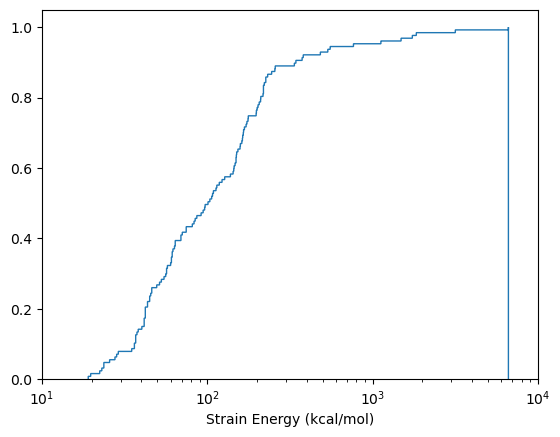

In [12]:
# plot cumulative distribution of energies

import matplotlib.pyplot as plt
import numpy as np

plt.hist(energies, bins=10000, cumulative=True, density=True, histtype="step")
plt.xlabel("Strain Energy (kcal/mol)")
plt.xscale("log")
plt.xlim(1e1, 1e4)

In [22]:
mol = dataset.load_mols(0)

In [23]:
mols = [dataset.load_mols(i) for i in range(len(dataset))]

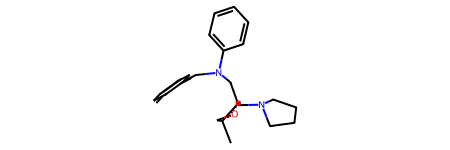

In [30]:
mols[10][0]